In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
data_dir = 'D:\\datasets'


In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('D:/datasets')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3447


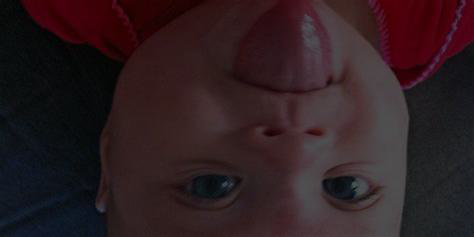

In [8]:
normalandothers = list(data_dir.glob('normalandothers/*'))
PIL.Image.open(str(normalandothers[3]))

In [9]:
images_dict = {
    'normalandothers': list(data_dir.glob('normalandothers/*')),
    'pemphigus': list(data_dir.glob('pemphigus/*')),
}

In [10]:
labels_dict = {
    'normalandothers': 0,
    'pemphigus': 1,
}

In [11]:
X, y = [], []

for name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
num_classes = 2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30
83/83 [==============================] - 39s 451ms/step - loss: 0.6091 - accuracy: 0.6663
Epoch 2/30
83/83 [==============================] - 37s 450ms/step - loss: 0.3752 - accuracy: 0.8297
Epoch 3/30
83/83 [==============================] - 38s 459ms/step - loss: 0.3180 - accuracy: 0.8606
Epoch 4/30
83/83 [==============================] - 39s 470ms/step - loss: 0.2223 - accuracy: 0.9093
Epoch 5/30
83/83 [==============================] - 40s 486ms/step - loss: 0.1707 - accuracy: 0.9322
Epoch 6/30
83/83 [==============================] - 42s 502ms/step - loss: 0.1403 - accuracy: 0.9440
Epoch 7/30
83/83 [==============================] - 40s 483ms/step - loss: 0.1270 - accuracy: 0.9516
Epoch 8/30
83/83 [==============================] - 38s 455ms/step - loss: 0.1016 - accuracy: 0.9623
Epoch 9/30
83/83 [==============================] - 37s 445ms/step - loss: 0.0754 - accuracy: 0.9760
Epoch 10/30
83/83 [==============================] - 37s 450ms/step - loss: 0.0633 - accura

In [17]:
model.evaluate(X_test_scaled,y_test)

28/28 [==============================] - 5s 145ms/step - loss: 0.3508 - accuracy: 0.9383


[0.3508245348930359, 0.9382857084274292]

In [18]:
predictions = model.predict(X_test_scaled)
predictions

28/28 [==============================] - 4s 144ms/step


array([[ 12.086398  ,  -5.433934  ],
       [  4.9097123 ,  -2.653422  ],
       [ -3.579943  ,   4.986802  ],
       ...,
       [ 28.834387  , -15.57822   ],
       [  5.9391127 ,  -2.0376089 ],
       [  5.300779  ,  -0.45629743]], dtype=float32)

In [37]:
score = tf.nn.softmax(predictions[0])

In [32]:
np.argmax(score)

1

In [38]:
if np.argmax(score)==0:
    print("Normal or Others")
else:
    print("Pemphigus")


Normal or Others


In [30]:
y_test[2]

1

In [29]:
y_test[:100]

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])